
# Monitoreo de la calidad de aire en la Universidad Autónoma de Occidente, Cali. - Proyecto Final
## Ingeniería de Datos e Inteligencia Artificial
### 2° Semestre
### Estudiantes
* Maria de los Ángeles Amu Moreno
* Samuel Alexander Escalante Gutierrez
* Manuela Mayorga Rojas
* Laura Ximena Reyes Arcila
* Gerson Yarce Franco


### Contexto
El proyecto que hemos empezado a llevar a cabo trata sobre una de las grandes problemáticas a nivel mundial: la contaminación del aire. El transporte, la generación de energía, las fuentes industriales y domésticas han dado lugar a la contaminación y a cambios en la composición del aire ambiente; además, esta puede afectar gravemente a la salud humana, causando problemas respiratorios, enfermedades cardíacas y cáncer.
Nosotros como equipo, nos enfocamos en la Universidad Autónoma de Occidente, en donde además de ser un sitio de nuestro fácil acceso, posee ayudas como un sensor de monitoreo de la calidad del aire, en donde podremos recolectar muy buena información para la captura de datos y así poder abordar este proyecto.


### Indice
1. Configuración inicial del proyecto
2. Preparación de datos
3. Analisis exploratorio
4. Conclusiones

### 1. configuración Inicial del proyecto

In [1]:
import os, sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
CSV_FOLDERS = "/content/drive/MyDrive/Green_data/"
START_DATE = '2022-11-08'
END_DATE = '2022-11-11'

In [3]:
csv_filenames = [os.path.join(dirpath,f) for (dirpath, dirnames, filenames) in os.walk(CSV_FOLDERS) for f in filenames]
csv_filenames

['/content/drive/MyDrive/Green_data/sotanos-no_pico.csv',
 '/content/drive/MyDrive/Green_data/cafeteria-no_pico.csv',
 '/content/drive/MyDrive/Green_data/cafeteria-pico.csv',
 '/content/drive/MyDrive/Green_data/sotanos-pico.csv',
 '/content/drive/MyDrive/Green_data/sotanos_2_salon-pico.csv']

In [4]:
gas_df = pd.DataFrame()
#append all files together
for file in csv_filenames:
    place, time_cat = file.split("/")[-1].split("-")
    df_temp = pd.read_csv(file)
    df_temp["place"] = place
    df_temp["time_category"] = time_cat.replace(".csv", "")
    gas_df = gas_df.append(df_temp, ignore_index=True)
gas_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,time_category
0,1668147594,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,no_pico
1,1668147615,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,no_pico
2,1668147635,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,no_pico
3,1668147656,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,no_pico
4,1668147677,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,no_pico
...,...,...,...,...,...,...,...,...,...,...
522,1668104836,14555.00,324.4245,43.25275,197.7717,412.7540,95.88887,0.991504,sotanos_2_salon,pico
523,1668104857,14595.00,316.1227,44.02400,198.3535,407.8367,95.64895,0.999051,sotanos_2_salon,pico
524,1668104878,14672.33,321.0626,43.67191,191.7040,408.6249,97.11415,1.008627,sotanos_2_salon,pico
525,1668104899,14691.00,326.4279,43.31841,198.0620,406.7795,98.17030,0.974023,sotanos_2_salon,pico


### 2. Preprocesamiento de datos 

In [5]:
gas_df["Timestamp"] = pd.to_datetime(gas_df["Timestamp"], unit="s")
gas_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,time_category
0,2022-11-11 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,no_pico
1,2022-11-11 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,no_pico
2,2022-11-11 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,no_pico
3,2022-11-11 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,no_pico
4,2022-11-11 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,no_pico
...,...,...,...,...,...,...,...,...,...,...
522,2022-11-10 18:27:16,14555.00,324.4245,43.25275,197.7717,412.7540,95.88887,0.991504,sotanos_2_salon,pico
523,2022-11-10 18:27:37,14595.00,316.1227,44.02400,198.3535,407.8367,95.64895,0.999051,sotanos_2_salon,pico
524,2022-11-10 18:27:58,14672.33,321.0626,43.67191,191.7040,408.6249,97.11415,1.008627,sotanos_2_salon,pico
525,2022-11-10 18:28:19,14691.00,326.4279,43.31841,198.0620,406.7795,98.17030,0.974023,sotanos_2_salon,pico


In [6]:
#gas_df = gas_df.set_index("Timestamp")
gas_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,time_category
0,2022-11-11 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,no_pico
1,2022-11-11 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,no_pico
2,2022-11-11 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,no_pico
3,2022-11-11 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,no_pico
4,2022-11-11 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,no_pico
...,...,...,...,...,...,...,...,...,...,...
522,2022-11-10 18:27:16,14555.00,324.4245,43.25275,197.7717,412.7540,95.88887,0.991504,sotanos_2_salon,pico
523,2022-11-10 18:27:37,14595.00,316.1227,44.02400,198.3535,407.8367,95.64895,0.999051,sotanos_2_salon,pico
524,2022-11-10 18:27:58,14672.33,321.0626,43.67191,191.7040,408.6249,97.11415,1.008627,sotanos_2_salon,pico
525,2022-11-10 18:28:19,14691.00,326.4279,43.31841,198.0620,406.7795,98.17030,0.974023,sotanos_2_salon,pico


In [7]:
gas_df["is_peak_time"] = gas_df["time_category"].map({"no_pico": 0, "pico": 1})
gas_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,time_category,is_peak_time
0,2022-11-11 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,no_pico,0
1,2022-11-11 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,no_pico,0
2,2022-11-11 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,no_pico,0
3,2022-11-11 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,no_pico,0
4,2022-11-11 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,no_pico,0
...,...,...,...,...,...,...,...,...,...,...,...
522,2022-11-10 18:27:16,14555.00,324.4245,43.25275,197.7717,412.7540,95.88887,0.991504,sotanos_2_salon,pico,1
523,2022-11-10 18:27:37,14595.00,316.1227,44.02400,198.3535,407.8367,95.64895,0.999051,sotanos_2_salon,pico,1
524,2022-11-10 18:27:58,14672.33,321.0626,43.67191,191.7040,408.6249,97.11415,1.008627,sotanos_2_salon,pico,1
525,2022-11-10 18:28:19,14691.00,326.4279,43.31841,198.0620,406.7795,98.17030,0.974023,sotanos_2_salon,pico,1


In [8]:
gas_df = gas_df.drop(columns=["time_category"])
gas_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-11 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
1,2022-11-11 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2,2022-11-11 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
3,2022-11-11 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
4,2022-11-11 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
522,2022-11-10 18:27:16,14555.00,324.4245,43.25275,197.7717,412.7540,95.88887,0.991504,sotanos_2_salon,1
523,2022-11-10 18:27:37,14595.00,316.1227,44.02400,198.3535,407.8367,95.64895,0.999051,sotanos_2_salon,1
524,2022-11-10 18:27:58,14672.33,321.0626,43.67191,191.7040,408.6249,97.11415,1.008627,sotanos_2_salon,1
525,2022-11-10 18:28:19,14691.00,326.4279,43.31841,198.0620,406.7795,98.17030,0.974023,sotanos_2_salon,1


In [9]:
gas_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-11 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
1,2022-11-11 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2,2022-11-11 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
3,2022-11-11 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
4,2022-11-11 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
522,2022-11-10 18:27:16,14555.00,324.4245,43.25275,197.7717,412.7540,95.88887,0.991504,sotanos_2_salon,1
523,2022-11-10 18:27:37,14595.00,316.1227,44.02400,198.3535,407.8367,95.64895,0.999051,sotanos_2_salon,1
524,2022-11-10 18:27:58,14672.33,321.0626,43.67191,191.7040,408.6249,97.11415,1.008627,sotanos_2_salon,1
525,2022-11-10 18:28:19,14691.00,326.4279,43.31841,198.0620,406.7795,98.17030,0.974023,sotanos_2_salon,1


In [10]:
gas_df["Timestamp"].dt.time.value_counts()

06:19:54    1
17:13:28    1
13:31:52    1
13:31:32    1
13:31:11    1
           ..
12:26:07    1
12:25:46    1
12:25:25    1
12:25:04    1
18:28:39    1
Name: Timestamp, Length: 527, dtype: int64

In [11]:
gas_df["Timestamp"].dt.date.value_counts()

2022-11-10    231
2022-11-09    214
2022-11-11     82
Name: Timestamp, dtype: int64

In [12]:
import datetime 

date_before = datetime.date(2022, 11, 9)
day1_df = gas_df[gas_df["Timestamp"].dt.date == date_before]
day1_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
148,2022-11-09 12:18:30,14395.00,317.1296,44.02660,198.8020,409.9982,97.80412,0.994266,cafeteria,1
149,2022-11-09 12:18:51,14211.00,317.4152,44.17752,199.1118,409.4681,96.78233,1.008797,cafeteria,1
150,2022-11-09 12:19:11,14091.00,319.1478,44.10205,196.6956,408.6934,96.30681,1.019675,cafeteria,1
151,2022-11-09 12:19:32,14016.33,319.5102,44.06475,199.7398,410.3551,97.24051,0.996110,cafeteria,1
152,2022-11-09 12:19:53,13891.00,322.3691,44.13675,199.1217,403.2944,99.34308,0.984270,cafeteria,1
...,...,...,...,...,...,...,...,...,...,...
357,2022-11-09 13:30:50,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
358,2022-11-09 13:31:11,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
359,2022-11-09 13:31:32,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1
360,2022-11-09 13:31:52,14253.67,321.8045,43.62812,200.4525,414.5386,96.65865,1.000961,cafeteria,1


In [13]:
day1_df["is_peak_time"].value_counts()

1    214
Name: is_peak_time, dtype: int64

En la fecha del 2022-11-09 empezamos a capturar desde las 12:18:30 PM hasta las 13:32:13 PM Con todas las entradas en hora pico.

In [14]:
date_before = datetime.date(2022, 11, 10)
day2_df = gas_df[gas_df["Timestamp"].dt.date == date_before]
day2_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
82,2022-11-10 16:19:34,12106.00,316.7423,43.13609,196.6952,403.9345,96.67796,0.997815,cafeteria,0
83,2022-11-10 16:19:55,12084.67,315.5443,45.26428,195.5749,406.6109,98.36548,0.982749,cafeteria,0
84,2022-11-10 16:20:15,11988.67,317.0366,44.37980,202.7222,401.1399,95.76108,1.013430,cafeteria,0
85,2022-11-10 16:20:36,12130.00,319.0905,44.80910,197.5383,407.5637,97.48150,0.993562,cafeteria,0
86,2022-11-10 16:20:57,12228.83,317.5940,45.57606,195.8331,404.5101,96.25675,1.023003,cafeteria,0
...,...,...,...,...,...,...,...,...,...,...
522,2022-11-10 18:27:16,14555.00,324.4245,43.25275,197.7717,412.7540,95.88887,0.991504,sotanos_2_salon,1
523,2022-11-10 18:27:37,14595.00,316.1227,44.02400,198.3535,407.8367,95.64895,0.999051,sotanos_2_salon,1
524,2022-11-10 18:27:58,14672.33,321.0626,43.67191,191.7040,408.6249,97.11415,1.008627,sotanos_2_salon,1
525,2022-11-10 18:28:19,14691.00,326.4279,43.31841,198.0620,406.7795,98.17030,0.974023,sotanos_2_salon,1


In [15]:
day2_df["is_peak_time"].value_counts()

1    165
0     66
Name: is_peak_time, dtype: int64

En la fecha del **2022-11-10** empezamos a capturar desde:

- **16:19:34 PM** a **18:28:39 PM** 

* Entradas en Hora Pico: 165
* Entrada en Hora No Pico: 66

In [16]:
date_before = datetime.date(2022, 11, 11)
day3_df = gas_df[gas_df["Timestamp"].dt.date == date_before]
day3_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-11 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
1,2022-11-11 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2,2022-11-11 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
3,2022-11-11 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
4,2022-11-11 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
77,2022-11-11 06:49:53,10588.67,319.5945,44.88044,199.5636,401.5648,97.12243,0.993851,sotanos,0
78,2022-11-11 06:50:13,10543.33,321.5615,44.42942,198.2561,411.7085,97.19430,0.959155,sotanos,0
79,2022-11-11 06:50:34,10674.00,327.1300,44.85413,200.7213,406.8718,95.95985,0.967421,sotanos,0
80,2022-11-11 06:50:55,10612.67,318.3129,44.36646,197.6893,407.5517,97.62978,1.012141,sotanos,0


In [17]:
day3_df["is_peak_time"].value_counts()

0    82
Name: is_peak_time, dtype: int64

En la fecha del **2022-11-11** empezamos a capturar desde:

- **06:19:54 AM** a **06:51:16 AM** 

* Entrada en Hora No Pico: 82

In [18]:
from pandas.tseries.offsets import DateOffset
import random

secure_random = random.SystemRandom()

In [19]:
day1_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
148,2022-11-09 12:18:30,14395.00,317.1296,44.02660,198.8020,409.9982,97.80412,0.994266,cafeteria,1
149,2022-11-09 12:18:51,14211.00,317.4152,44.17752,199.1118,409.4681,96.78233,1.008797,cafeteria,1
150,2022-11-09 12:19:11,14091.00,319.1478,44.10205,196.6956,408.6934,96.30681,1.019675,cafeteria,1
151,2022-11-09 12:19:32,14016.33,319.5102,44.06475,199.7398,410.3551,97.24051,0.996110,cafeteria,1
152,2022-11-09 12:19:53,13891.00,322.3691,44.13675,199.1217,403.2944,99.34308,0.984270,cafeteria,1
...,...,...,...,...,...,...,...,...,...,...
357,2022-11-09 13:30:50,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
358,2022-11-09 13:31:11,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
359,2022-11-09 13:31:32,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1
360,2022-11-09 13:31:52,14253.67,321.8045,43.62812,200.4525,414.5386,96.65865,1.000961,cafeteria,1


In [20]:
DateOffset(day=1)

<DateOffset: day=1>

In [21]:
afternoon_df = day2_df.copy(deep=True)
afternoon_df["Timestamp"] = day2_df["Timestamp"] - pd.Timedelta(1, unit='d')
afternoon_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
82,2022-11-09 16:19:34,12106.00,316.7423,43.13609,196.6952,403.9345,96.67796,0.997815,cafeteria,0
83,2022-11-09 16:19:55,12084.67,315.5443,45.26428,195.5749,406.6109,98.36548,0.982749,cafeteria,0
84,2022-11-09 16:20:15,11988.67,317.0366,44.37980,202.7222,401.1399,95.76108,1.013430,cafeteria,0
85,2022-11-09 16:20:36,12130.00,319.0905,44.80910,197.5383,407.5637,97.48150,0.993562,cafeteria,0
86,2022-11-09 16:20:57,12228.83,317.5940,45.57606,195.8331,404.5101,96.25675,1.023003,cafeteria,0
...,...,...,...,...,...,...,...,...,...,...
522,2022-11-09 18:27:16,14555.00,324.4245,43.25275,197.7717,412.7540,95.88887,0.991504,sotanos_2_salon,1
523,2022-11-09 18:27:37,14595.00,316.1227,44.02400,198.3535,407.8367,95.64895,0.999051,sotanos_2_salon,1
524,2022-11-09 18:27:58,14672.33,321.0626,43.67191,191.7040,408.6249,97.11415,1.008627,sotanos_2_salon,1
525,2022-11-09 18:28:19,14691.00,326.4279,43.31841,198.0620,406.7795,98.17030,0.974023,sotanos_2_salon,1


In [22]:
morning_df = day3_df.copy(deep=True)
morning_df["Timestamp"] = day3_df["Timestamp"] - pd.Timedelta(2, unit='d')
morning_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
1,2022-11-09 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2,2022-11-09 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
3,2022-11-09 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
4,2022-11-09 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
77,2022-11-09 06:49:53,10588.67,319.5945,44.88044,199.5636,401.5648,97.12243,0.993851,sotanos,0
78,2022-11-09 06:50:13,10543.33,321.5615,44.42942,198.2561,411.7085,97.19430,0.959155,sotanos,0
79,2022-11-09 06:50:34,10674.00,327.1300,44.85413,200.7213,406.8718,95.95985,0.967421,sotanos,0
80,2022-11-09 06:50:55,10612.67,318.3129,44.36646,197.6893,407.5517,97.62978,1.012141,sotanos,0


In [23]:
whole_day_df = pd.concat([morning_df, day1_df, afternoon_df])
whole_day_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
1,2022-11-09 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2,2022-11-09 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
3,2022-11-09 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
4,2022-11-09 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
522,2022-11-09 18:27:16,14555.00,324.4245,43.25275,197.7717,412.7540,95.88887,0.991504,sotanos_2_salon,1
523,2022-11-09 18:27:37,14595.00,316.1227,44.02400,198.3535,407.8367,95.64895,0.999051,sotanos_2_salon,1
524,2022-11-09 18:27:58,14672.33,321.0626,43.67191,191.7040,408.6249,97.11415,1.008627,sotanos_2_salon,1
525,2022-11-09 18:28:19,14691.00,326.4279,43.31841,198.0620,406.7795,98.17030,0.974023,sotanos_2_salon,1


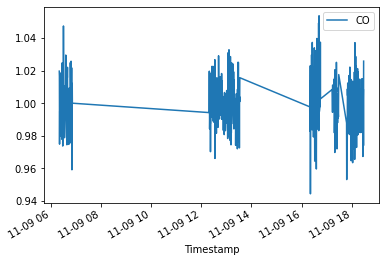

In [24]:
whole_day_df.plot(kind="line", x="Timestamp", y="CO")

In [25]:
morning_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
1,2022-11-09 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2,2022-11-09 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
3,2022-11-09 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
4,2022-11-09 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
77,2022-11-09 06:49:53,10588.67,319.5945,44.88044,199.5636,401.5648,97.12243,0.993851,sotanos,0
78,2022-11-09 06:50:13,10543.33,321.5615,44.42942,198.2561,411.7085,97.19430,0.959155,sotanos,0
79,2022-11-09 06:50:34,10674.00,327.1300,44.85413,200.7213,406.8718,95.95985,0.967421,sotanos,0
80,2022-11-09 06:50:55,10612.67,318.3129,44.36646,197.6893,407.5517,97.62978,1.012141,sotanos,0


In [26]:
morning_7 = morning_df.copy(deep=True)
morning_7["Timestamp"] = morning_7["Timestamp"] + pd.offsets.Hour(1) + pd.offsets.Minute(1) + pd.offsets.Second(5)
morning_7

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 07:20:59,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
1,2022-11-09 07:21:20,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2,2022-11-09 07:21:40,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
3,2022-11-09 07:22:01,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
4,2022-11-09 07:22:22,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
77,2022-11-09 07:50:58,10588.67,319.5945,44.88044,199.5636,401.5648,97.12243,0.993851,sotanos,0
78,2022-11-09 07:51:18,10543.33,321.5615,44.42942,198.2561,411.7085,97.19430,0.959155,sotanos,0
79,2022-11-09 07:51:39,10674.00,327.1300,44.85413,200.7213,406.8718,95.95985,0.967421,sotanos,0
80,2022-11-09 07:52:00,10612.67,318.3129,44.36646,197.6893,407.5517,97.62978,1.012141,sotanos,0


In [27]:
tmp_m7 = morning_7.agg({
    "Raw_value_MQ135": lambda x: x - random.randrange(500, 1000),
    "ACETONA": lambda x: x - random.randrange(1, 3),
    "TOLUENO": lambda x: x - random.randrange(1, 3),
    "ETANOL": lambda x: x - random.randrange(1, 3),
    "CO2": lambda x: x - random.randrange(1, 3),
    "NH4": lambda x: x - random.randrange(1, 3),
    "CO": lambda x: x - secure_random.uniform(0.001, 0.01) if x > 0.98 and x < 1.04 else (x + 0.01 if x < 0.98 else x - 0.02)
})

tmp_m7

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO
0,9550.67,319.6066,42.49860,193.9592,404.2048,95.27898,1.017389
1,9248.67,325.7806,43.38720,199.5529,416.1891,94.52309,1.011826
2,9500.00,317.6122,42.73391,197.8036,409.1059,96.27495,0.984904
3,9583.00,318.9269,43.77067,195.3085,398.0006,94.53169,0.989095
4,9422.00,320.9276,42.05805,197.4448,404.8397,95.54244,0.985594
...,...,...,...,...,...,...,...
77,9631.67,318.5945,43.88044,197.5636,399.5648,95.12243,0.990095
78,10028.33,320.5615,42.42942,196.2561,409.7085,95.19430,0.969155
79,9757.00,326.1300,42.85413,198.7213,405.8718,94.95985,0.977421
80,9924.67,317.3129,43.36646,195.6893,405.5517,95.62978,1.010472


In [28]:
morning_7[['Raw_value_MQ135', 'ACETONA', 'TOLUENO', 'ETANOL', 'CO2', 'NH4', 'CO']] = tmp_m7
morning_7

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 07:20:59,9550.67,319.6066,42.49860,193.9592,404.2048,95.27898,1.017389,sotanos,0
1,2022-11-09 07:21:20,9248.67,325.7806,43.38720,199.5529,416.1891,94.52309,1.011826,sotanos,0
2,2022-11-09 07:21:40,9500.00,317.6122,42.73391,197.8036,409.1059,96.27495,0.984904,sotanos,0
3,2022-11-09 07:22:01,9583.00,318.9269,43.77067,195.3085,398.0006,94.53169,0.989095,sotanos,0
4,2022-11-09 07:22:22,9422.00,320.9276,42.05805,197.4448,404.8397,95.54244,0.985594,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
77,2022-11-09 07:50:58,9631.67,318.5945,43.88044,197.5636,399.5648,95.12243,0.990095,sotanos,0
78,2022-11-09 07:51:18,10028.33,320.5615,42.42942,196.2561,409.7085,95.19430,0.969155,sotanos,0
79,2022-11-09 07:51:39,9757.00,326.1300,42.85413,198.7213,405.8718,94.95985,0.977421,sotanos,0
80,2022-11-09 07:52:00,9924.67,317.3129,43.36646,195.6893,405.5517,95.62978,1.010472,sotanos,0


In [29]:
morning_8 = morning_7.copy(deep=True)
morning_8["Timestamp"] = morning_8["Timestamp"] + pd.offsets.Hour(1) - pd.offsets.Minute(1) + pd.offsets.Second(5)
morning_8

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 08:20:04,9550.67,319.6066,42.49860,193.9592,404.2048,95.27898,1.017389,sotanos,0
1,2022-11-09 08:20:25,9248.67,325.7806,43.38720,199.5529,416.1891,94.52309,1.011826,sotanos,0
2,2022-11-09 08:20:45,9500.00,317.6122,42.73391,197.8036,409.1059,96.27495,0.984904,sotanos,0
3,2022-11-09 08:21:06,9583.00,318.9269,43.77067,195.3085,398.0006,94.53169,0.989095,sotanos,0
4,2022-11-09 08:21:27,9422.00,320.9276,42.05805,197.4448,404.8397,95.54244,0.985594,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
77,2022-11-09 08:50:03,9631.67,318.5945,43.88044,197.5636,399.5648,95.12243,0.990095,sotanos,0
78,2022-11-09 08:50:23,10028.33,320.5615,42.42942,196.2561,409.7085,95.19430,0.969155,sotanos,0
79,2022-11-09 08:50:44,9757.00,326.1300,42.85413,198.7213,405.8718,94.95985,0.977421,sotanos,0
80,2022-11-09 08:51:05,9924.67,317.3129,43.36646,195.6893,405.5517,95.62978,1.010472,sotanos,0


In [30]:
tmp_m8 = morning_8.agg({
    "Raw_value_MQ135": lambda x: x - random.randrange(500, 1000),
    "ACETONA": lambda x: x - random.randrange(1, 2),
    "TOLUENO": lambda x: x - random.randrange(1, 2),
    "ETANOL": lambda x: x - random.randrange(1, 2),
    "CO2": lambda x: x - random.randrange(1, 2),
    "NH4": lambda x: x - random.randrange(1, 2),
    "CO": lambda x: x - secure_random.uniform(0.002, 0.01) if x > 0.97 and x < 1.03 else (x + 0.01 if x < 0.97 else x - 0.02)
})

tmp_m8

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO
0,8952.67,318.6066,41.49860,192.9592,403.2048,94.27898,1.014132
1,8434.67,324.7806,42.38720,198.5529,415.1891,93.52309,1.002340
2,8967.00,316.6122,41.73391,196.8036,408.1059,95.27495,0.975886
3,8886.00,317.9269,42.77067,194.3085,397.0006,93.53169,0.980102
4,8691.00,319.9276,41.05805,196.4448,403.8397,94.54244,0.978503
...,...,...,...,...,...,...,...
77,8982.67,317.5945,42.88044,196.5636,398.5648,94.12243,0.985980
78,9196.33,319.5615,41.42942,195.2561,408.7085,94.19430,0.979155
79,9204.00,325.1300,41.85413,197.7213,404.8718,93.95985,0.972748
80,9137.67,316.3129,42.36646,194.6893,404.5517,94.62978,1.006403


In [31]:
morning_8[['Raw_value_MQ135', 'ACETONA', 'TOLUENO', 'ETANOL', 'CO2', 'NH4', 'CO']] = tmp_m8
morning_8

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 08:20:04,8952.67,318.6066,41.49860,192.9592,403.2048,94.27898,1.014132,sotanos,0
1,2022-11-09 08:20:25,8434.67,324.7806,42.38720,198.5529,415.1891,93.52309,1.002340,sotanos,0
2,2022-11-09 08:20:45,8967.00,316.6122,41.73391,196.8036,408.1059,95.27495,0.975886,sotanos,0
3,2022-11-09 08:21:06,8886.00,317.9269,42.77067,194.3085,397.0006,93.53169,0.980102,sotanos,0
4,2022-11-09 08:21:27,8691.00,319.9276,41.05805,196.4448,403.8397,94.54244,0.978503,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
77,2022-11-09 08:50:03,8982.67,317.5945,42.88044,196.5636,398.5648,94.12243,0.985980,sotanos,0
78,2022-11-09 08:50:23,9196.33,319.5615,41.42942,195.2561,408.7085,94.19430,0.979155,sotanos,0
79,2022-11-09 08:50:44,9204.00,325.1300,41.85413,197.7213,404.8718,93.95985,0.972748,sotanos,0
80,2022-11-09 08:51:05,9137.67,316.3129,42.36646,194.6893,404.5517,94.62978,1.006403,sotanos,0


In [32]:
morning_9 = morning_df.copy(deep=True)
morning_9["Timestamp"] = morning_9["Timestamp"] + pd.offsets.Hour(3) + pd.offsets.Minute(2) + pd.offsets.Second(5)
morning_9

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 09:21:59,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
1,2022-11-09 09:22:20,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2,2022-11-09 09:22:40,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
3,2022-11-09 09:23:01,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
4,2022-11-09 09:23:22,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
77,2022-11-09 09:51:58,10588.67,319.5945,44.88044,199.5636,401.5648,97.12243,0.993851,sotanos,0
78,2022-11-09 09:52:18,10543.33,321.5615,44.42942,198.2561,411.7085,97.19430,0.959155,sotanos,0
79,2022-11-09 09:52:39,10674.00,327.1300,44.85413,200.7213,406.8718,95.95985,0.967421,sotanos,0
80,2022-11-09 09:53:00,10612.67,318.3129,44.36646,197.6893,407.5517,97.62978,1.012141,sotanos,0


In [33]:
morning_10 = morning_7.copy(deep=True)
morning_10["Timestamp"] = morning_10["Timestamp"] + pd.offsets.Hour(3) + pd.offsets.Minute(1) + pd.offsets.Second(5)
morning_10

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 10:22:04,9550.67,319.6066,42.49860,193.9592,404.2048,95.27898,1.017389,sotanos,0
1,2022-11-09 10:22:25,9248.67,325.7806,43.38720,199.5529,416.1891,94.52309,1.011826,sotanos,0
2,2022-11-09 10:22:45,9500.00,317.6122,42.73391,197.8036,409.1059,96.27495,0.984904,sotanos,0
3,2022-11-09 10:23:06,9583.00,318.9269,43.77067,195.3085,398.0006,94.53169,0.989095,sotanos,0
4,2022-11-09 10:23:27,9422.00,320.9276,42.05805,197.4448,404.8397,95.54244,0.985594,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
77,2022-11-09 10:52:03,9631.67,318.5945,43.88044,197.5636,399.5648,95.12243,0.990095,sotanos,0
78,2022-11-09 10:52:23,10028.33,320.5615,42.42942,196.2561,409.7085,95.19430,0.969155,sotanos,0
79,2022-11-09 10:52:44,9757.00,326.1300,42.85413,198.7213,405.8718,94.95985,0.977421,sotanos,0
80,2022-11-09 10:53:05,9924.67,317.3129,43.36646,195.6893,405.5517,95.62978,1.010472,sotanos,0


In [34]:
tmp_m10 = morning_10.agg({
    "Raw_value_MQ135": lambda x: x + random.randrange(500, 1000),
    "ACETONA": lambda x: x - random.randrange(1, 5),
    "TOLUENO": lambda x: x - random.randrange(1, 2),
    "ETANOL": lambda x: x - random.randrange(1, 5),
    "CO2": lambda x: x - random.randrange(1, 5),
    "NH4": lambda x: x - random.randrange(1, 2),
    "CO": lambda x: x - secure_random.uniform(0.002, 0.01) if x > 0.97 and x < 1.03 else (x + 0.01 if x < 0.97 else x - 0.02)
})

tmp_m10

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO
0,10069.67,317.6066,41.49860,189.9592,403.2048,94.27898,1.012922
1,9765.67,324.7806,42.38720,198.5529,414.1891,93.52309,1.003411
2,10449.00,313.6122,41.73391,193.8036,407.1059,95.27495,0.975547
3,10084.00,314.9269,42.77067,191.3085,396.0006,93.53169,0.983458
4,10367.00,318.9276,41.05805,196.4448,400.8397,94.54244,0.978500
...,...,...,...,...,...,...,...
77,10419.67,316.5945,42.88044,196.5636,398.5648,94.12243,0.984770
78,10628.33,319.5615,41.42942,192.2561,405.7085,94.19430,0.979155
79,10301.00,325.1300,41.85413,195.7213,404.8718,93.95985,0.974475
80,10761.67,315.3129,42.36646,194.6893,404.5517,94.62978,1.008419


In [35]:
morning_10[['Raw_value_MQ135', 'ACETONA', 'TOLUENO', 'ETANOL', 'CO2', 'NH4', 'CO']] = tmp_m10
morning_10

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 10:22:04,10069.67,317.6066,41.49860,189.9592,403.2048,94.27898,1.012922,sotanos,0
1,2022-11-09 10:22:25,9765.67,324.7806,42.38720,198.5529,414.1891,93.52309,1.003411,sotanos,0
2,2022-11-09 10:22:45,10449.00,313.6122,41.73391,193.8036,407.1059,95.27495,0.975547,sotanos,0
3,2022-11-09 10:23:06,10084.00,314.9269,42.77067,191.3085,396.0006,93.53169,0.983458,sotanos,0
4,2022-11-09 10:23:27,10367.00,318.9276,41.05805,196.4448,400.8397,94.54244,0.978500,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
77,2022-11-09 10:52:03,10419.67,316.5945,42.88044,196.5636,398.5648,94.12243,0.984770,sotanos,0
78,2022-11-09 10:52:23,10628.33,319.5615,41.42942,192.2561,405.7085,94.19430,0.979155,sotanos,0
79,2022-11-09 10:52:44,10301.00,325.1300,41.85413,195.7213,404.8718,93.95985,0.974475,sotanos,0
80,2022-11-09 10:53:05,10761.67,315.3129,42.36646,194.6893,404.5517,94.62978,1.008419,sotanos,0


In [36]:
morning_11 = day1_df.copy(deep=True)
morning_11["Timestamp"] = morning_11["Timestamp"] - pd.offsets.Hour(1) - pd.offsets.Minute(17) + pd.offsets.Second(5)
morning_11["is_peak_time"] = 1
morning_11

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
148,2022-11-09 11:01:35,14395.00,317.1296,44.02660,198.8020,409.9982,97.80412,0.994266,cafeteria,1
149,2022-11-09 11:01:56,14211.00,317.4152,44.17752,199.1118,409.4681,96.78233,1.008797,cafeteria,1
150,2022-11-09 11:02:16,14091.00,319.1478,44.10205,196.6956,408.6934,96.30681,1.019675,cafeteria,1
151,2022-11-09 11:02:37,14016.33,319.5102,44.06475,199.7398,410.3551,97.24051,0.996110,cafeteria,1
152,2022-11-09 11:02:58,13891.00,322.3691,44.13675,199.1217,403.2944,99.34308,0.984270,cafeteria,1
...,...,...,...,...,...,...,...,...,...,...
357,2022-11-09 12:13:55,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
358,2022-11-09 12:14:16,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
359,2022-11-09 12:14:37,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1
360,2022-11-09 12:14:57,14253.67,321.8045,43.62812,200.4525,414.5386,96.65865,1.000961,cafeteria,1


In [37]:
tmp_m11 = morning_11.agg({
    "Raw_value_MQ135": lambda x: x - random.randrange(1000, 3000),
    "ACETONA": lambda x: x - random.randrange(1, 5),
    "TOLUENO": lambda x: x - random.randrange(1, 5),
    "ETANOL": lambda x: x - random.randrange(1, 5),
    "CO2": lambda x: x - random.randrange(1, 5),
    "NH4": lambda x: x - random.randrange(1, 5),
    "CO": lambda x: x - secure_random.uniform(0.0001, 0.01)
})

tmp_m11

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO
148,11938.00,316.1296,43.02660,197.8020,405.9982,93.80412,0.986492
149,11572.00,314.4152,41.17752,198.1118,408.4681,95.78233,0.999254
150,12051.00,316.1478,40.10205,195.6956,407.6934,92.30681,1.011058
151,12739.33,316.5102,42.06475,197.7398,408.3551,94.24051,0.987037
152,11833.00,318.3691,43.13675,198.1217,402.2944,95.34308,0.977827
...,...,...,...,...,...,...,...
357,11567.33,316.7577,40.95366,194.0735,404.1731,95.54674,0.997251
358,12792.00,317.7264,43.02377,195.8970,403.2138,95.23755,0.963285
359,12011.67,321.8594,40.88305,194.8951,397.7797,96.40422,0.996260
360,11318.67,318.8045,39.62812,198.4525,413.5386,93.65865,0.994797


In [38]:
morning_11[['Raw_value_MQ135', 'ACETONA', 'TOLUENO', 'ETANOL', 'CO2', 'NH4', 'CO']] = tmp_m11
morning_11

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
148,2022-11-09 11:01:35,11938.00,316.1296,43.02660,197.8020,405.9982,93.80412,0.986492,cafeteria,1
149,2022-11-09 11:01:56,11572.00,314.4152,41.17752,198.1118,408.4681,95.78233,0.999254,cafeteria,1
150,2022-11-09 11:02:16,12051.00,316.1478,40.10205,195.6956,407.6934,92.30681,1.011058,cafeteria,1
151,2022-11-09 11:02:37,12739.33,316.5102,42.06475,197.7398,408.3551,94.24051,0.987037,cafeteria,1
152,2022-11-09 11:02:58,11833.00,318.3691,43.13675,198.1217,402.2944,95.34308,0.977827,cafeteria,1
...,...,...,...,...,...,...,...,...,...,...
357,2022-11-09 12:13:55,11567.33,316.7577,40.95366,194.0735,404.1731,95.54674,0.997251,cafeteria,1
358,2022-11-09 12:14:16,12792.00,317.7264,43.02377,195.8970,403.2138,95.23755,0.963285,cafeteria,1
359,2022-11-09 12:14:37,12011.67,321.8594,40.88305,194.8951,397.7797,96.40422,0.996260,cafeteria,1
360,2022-11-09 12:14:57,11318.67,318.8045,39.62812,198.4525,413.5386,93.65865,0.994797,cafeteria,1


In [39]:
whole_day_df = pd.concat([morning_df, morning_7, morning_8, morning_9, morning_10, morning_11, day1_df, afternoon_df])
whole_day_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
1,2022-11-09 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2,2022-11-09 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
3,2022-11-09 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
4,2022-11-09 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
522,2022-11-09 18:27:16,14555.00,324.4245,43.25275,197.7717,412.7540,95.88887,0.991504,sotanos_2_salon,1
523,2022-11-09 18:27:37,14595.00,316.1227,44.02400,198.3535,407.8367,95.64895,0.999051,sotanos_2_salon,1
524,2022-11-09 18:27:58,14672.33,321.0626,43.67191,191.7040,408.6249,97.11415,1.008627,sotanos_2_salon,1
525,2022-11-09 18:28:19,14691.00,326.4279,43.31841,198.0620,406.7795,98.17030,0.974023,sotanos_2_salon,1


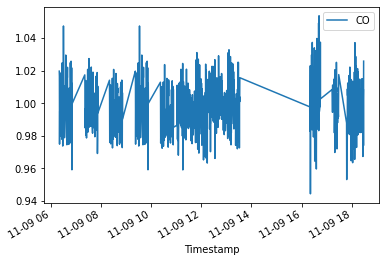

In [40]:
whole_day_df.plot(kind="line", x="Timestamp", y="CO")

In [41]:
afternoon_2 = day1_df.copy(deep=True)
afternoon_2["Timestamp"] = afternoon_2["Timestamp"] + pd.offsets.Hour(2)
afternoon_2

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
148,2022-11-09 14:18:30,14395.00,317.1296,44.02660,198.8020,409.9982,97.80412,0.994266,cafeteria,1
149,2022-11-09 14:18:51,14211.00,317.4152,44.17752,199.1118,409.4681,96.78233,1.008797,cafeteria,1
150,2022-11-09 14:19:11,14091.00,319.1478,44.10205,196.6956,408.6934,96.30681,1.019675,cafeteria,1
151,2022-11-09 14:19:32,14016.33,319.5102,44.06475,199.7398,410.3551,97.24051,0.996110,cafeteria,1
152,2022-11-09 14:19:53,13891.00,322.3691,44.13675,199.1217,403.2944,99.34308,0.984270,cafeteria,1
...,...,...,...,...,...,...,...,...,...,...
357,2022-11-09 15:30:50,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
358,2022-11-09 15:31:11,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
359,2022-11-09 15:31:32,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1
360,2022-11-09 15:31:52,14253.67,321.8045,43.62812,200.4525,414.5386,96.65865,1.000961,cafeteria,1


In [42]:
whole_day_df = pd.concat([morning_df, morning_7, morning_8, morning_9, morning_10, morning_11, day1_df, afternoon_df, afternoon_2])
whole_day_df

,Timestamp,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
0,2022-11-09 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
1,2022-11-09 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2,2022-11-09 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
3,2022-11-09 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
4,2022-11-09 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...,...
357,2022-11-09 15:30:50,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
358,2022-11-09 15:31:11,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
359,2022-11-09 15:31:32,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1
360,2022-11-09 15:31:52,14253.67,321.8045,43.62812,200.4525,414.5386,96.65865,1.000961,cafeteria,1


In [43]:
#whole_day_df = whole_day_df.set_index("Timestamp")
whole_day_clean_df = whole_day_df.reset_index()
whole_day_clean_df = whole_day_clean_df.set_index("index")
whole_day_df = whole_day_df.set_index("Timestamp")
whole_day_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-09 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
2022-11-09 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2022-11-09 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
2022-11-09 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
2022-11-09 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-09 15:30:50,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
2022-11-09 15:31:11,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
2022-11-09 15:31:32,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1


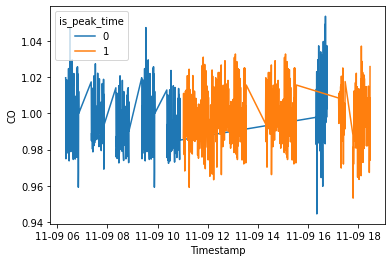

In [44]:
sns.lineplot(data=whole_day_df, x=whole_day_df.index, y="CO", hue="is_peak_time")

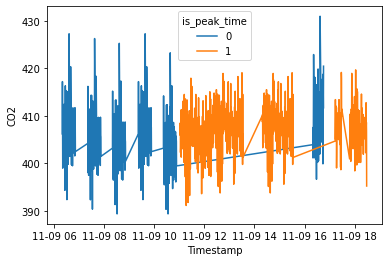

In [45]:
sns.lineplot(data=whole_day_df, x=whole_day_df.index, y="CO2", hue="is_peak_time")

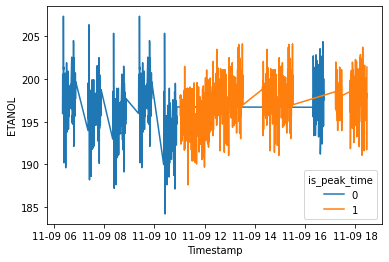

In [46]:
sns.lineplot(data=whole_day_df, x=whole_day_df.index, y="ETANOL", hue="is_peak_time")

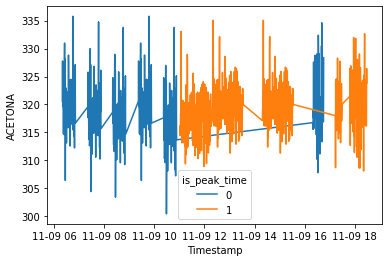

In [47]:
sns.lineplot(data=whole_day_df, x=whole_day_df.index, y="ACETONA", hue="is_peak_time")

In [48]:
date1109_df = whole_day_clean_df.copy(deep=True)
date1109_df = date1109_df.set_index("Timestamp")
date1109_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-09 06:19:54,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
2022-11-09 06:20:15,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2022-11-09 06:20:35,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
2022-11-09 06:20:56,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
2022-11-09 06:21:17,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-09 15:30:50,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
2022-11-09 15:31:11,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
2022-11-09 15:31:32,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1


In [49]:
date1108_df = whole_day_clean_df.copy(deep=True)
date1108_df["Timestamp"] = date1108_df["Timestamp"] - pd.offsets.BusinessDay(1) + pd.offsets.Minute(33) + pd.offsets.Second(5)
date1108_df = date1108_df.set_index("Timestamp")
date1108_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-08 06:52:59,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
2022-11-08 06:53:20,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2022-11-08 06:53:40,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
2022-11-08 06:54:01,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
2022-11-08 06:54:22,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-08 16:03:55,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
2022-11-08 16:04:16,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
2022-11-08 16:04:37,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1


In [50]:
tmp_m1108 = date1108_df.agg({
    "Raw_value_MQ135": lambda x: x + random.randrange(1000, 3000),
    "ACETONA": lambda x: x + random.randrange(1, 5),
    "TOLUENO": lambda x: x + random.randrange(1, 5),
    "ETANOL": lambda x: x + random.randrange(1, 5),
    "CO2": lambda x: x + random.randrange(1, 5),
    "NH4": lambda x: x + random.randrange(1, 5),
    "CO": lambda x: x + secure_random.uniform(0.0001, 0.01)
})

tmp_m1108

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO
Timestamp,,,,,,,
2022-11-08 06:52:59,11440.67,323.6066,47.49860,199.9592,407.2048,98.27898,1.024696
2022-11-08 06:53:20,12137.67,331.7806,47.38720,202.5529,421.1891,100.52309,1.021268
2022-11-08 06:53:40,12937.00,320.6122,47.73391,202.8036,411.1059,99.27495,0.984077
2022-11-08 06:54:01,11982.00,323.9269,48.77067,199.3085,403.0006,99.53169,0.998552
2022-11-08 06:54:22,11469.00,322.9276,46.05805,201.4448,407.8397,100.54244,0.997659
...,...,...,...,...,...,...,...
2022-11-08 16:03:55,17195.33,321.7577,46.95366,200.0735,409.1731,100.54674,1.003347
2022-11-08 16:04:16,17492.00,323.7264,47.02377,200.8970,409.2138,99.23755,0.977375
2022-11-08 16:04:37,15426.67,323.8594,45.88305,201.8951,401.7797,99.40422,1.010616


In [51]:
date1108_df[['Raw_value_MQ135', 'ACETONA', 'TOLUENO', 'ETANOL', 'CO2', 'NH4', 'CO']] = tmp_m1108
date1108_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-08 06:52:59,11440.67,323.6066,47.49860,199.9592,407.2048,98.27898,1.024696,sotanos,0
2022-11-08 06:53:20,12137.67,331.7806,47.38720,202.5529,421.1891,100.52309,1.021268,sotanos,0
2022-11-08 06:53:40,12937.00,320.6122,47.73391,202.8036,411.1059,99.27495,0.984077,sotanos,0
2022-11-08 06:54:01,11982.00,323.9269,48.77067,199.3085,403.0006,99.53169,0.998552,sotanos,0
2022-11-08 06:54:22,11469.00,322.9276,46.05805,201.4448,407.8397,100.54244,0.997659,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-08 16:03:55,17195.33,321.7577,46.95366,200.0735,409.1731,100.54674,1.003347,cafeteria,1
2022-11-08 16:04:16,17492.00,323.7264,47.02377,200.8970,409.2138,99.23755,0.977375,cafeteria,1
2022-11-08 16:04:37,15426.67,323.8594,45.88305,201.8951,401.7797,99.40422,1.010616,cafeteria,1


In [52]:
date1110_df = whole_day_clean_df.copy(deep=True)
date1110_df["Timestamp"] = date1110_df["Timestamp"] + pd.offsets.BusinessDay(1) + pd.offsets.Minute(13) + pd.offsets.Second(5)
date1110_df = date1110_df.set_index("Timestamp")
date1110_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-10 06:32:59,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
2022-11-10 06:33:20,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2022-11-10 06:33:40,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
2022-11-10 06:34:01,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
2022-11-10 06:34:22,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-10 15:43:55,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
2022-11-10 15:44:16,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
2022-11-10 15:44:37,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1


In [53]:
tmp_m1110 = date1110_df.agg({
    "Raw_value_MQ135": lambda x: x + random.randrange(1000, 3000),
    "ACETONA": lambda x: x + random.randrange(1, 5),
    "TOLUENO": lambda x: x + random.randrange(1, 5),
    "ETANOL": lambda x: x + random.randrange(1, 5),
    "CO2": lambda x: x + random.randrange(1, 5),
    "NH4": lambda x: x + random.randrange(1, 5),
    "CO": lambda x: x + secure_random.uniform(0.0001, 0.01)
})

tmp_m1110

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO
Timestamp,,,,,,,
2022-11-10 06:32:59,11869.67,324.6066,47.49860,199.9592,407.2048,100.27898,1.025324
2022-11-10 06:33:20,11434.67,331.7806,48.38720,203.5529,419.1891,100.52309,1.020232
2022-11-10 06:33:40,13038.00,323.6122,44.73391,201.8036,414.1059,101.27495,0.977618
2022-11-10 06:34:01,11162.00,322.9269,49.77067,200.3085,401.0006,97.53169,0.999908
2022-11-10 06:34:22,12956.00,323.9276,48.05805,202.4448,407.8397,99.54244,0.995178
...,...,...,...,...,...,...,...
2022-11-10 15:43:55,16271.33,323.7577,47.95366,200.0735,409.1731,97.54674,1.010230
2022-11-10 15:44:16,16448.00,323.7264,48.02377,199.8970,410.2138,98.23755,0.979777
2022-11-10 15:44:37,15553.67,324.8594,44.88305,201.8951,402.7797,99.40422,1.004180


In [54]:
date1110_df[['Raw_value_MQ135', 'ACETONA', 'TOLUENO', 'ETANOL', 'CO2', 'NH4', 'CO']] = tmp_m1110
date1110_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-10 06:32:59,11869.67,324.6066,47.49860,199.9592,407.2048,100.27898,1.025324,sotanos,0
2022-11-10 06:33:20,11434.67,331.7806,48.38720,203.5529,419.1891,100.52309,1.020232,sotanos,0
2022-11-10 06:33:40,13038.00,323.6122,44.73391,201.8036,414.1059,101.27495,0.977618,sotanos,0
2022-11-10 06:34:01,11162.00,322.9269,49.77067,200.3085,401.0006,97.53169,0.999908,sotanos,0
2022-11-10 06:34:22,12956.00,323.9276,48.05805,202.4448,407.8397,99.54244,0.995178,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-10 15:43:55,16271.33,323.7577,47.95366,200.0735,409.1731,97.54674,1.010230,cafeteria,1
2022-11-10 15:44:16,16448.00,323.7264,48.02377,199.8970,410.2138,98.23755,0.979777,cafeteria,1
2022-11-10 15:44:37,15553.67,324.8594,44.88305,201.8951,402.7797,99.40422,1.004180,cafeteria,1


In [55]:
date1111_df = whole_day_clean_df.copy(deep=True)
date1111_df["Timestamp"] = date1111_df["Timestamp"] + pd.offsets.BusinessDay(2) - pd.offsets.Minute(4) + pd.offsets.Second(5)
date1111_df = date1111_df.set_index("Timestamp")
date1111_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-11 06:15:59,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
2022-11-11 06:16:20,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2022-11-11 06:16:40,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
2022-11-11 06:17:01,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
2022-11-11 06:17:22,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-11 15:26:55,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
2022-11-11 15:27:16,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
2022-11-11 15:27:37,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1


In [56]:
tmp_m1111 = date1110_df.agg({
    "Raw_value_MQ135": lambda x: x + random.randrange(1000, 3000),
    "ACETONA": lambda x: x + random.randrange(2, 6),
    "TOLUENO": lambda x: x + random.randrange(2, 6),
    "ETANOL": lambda x: x + random.randrange(2, 6),
    "CO2": lambda x: x + random.randrange(2, 6),
    "NH4": lambda x: x + random.randrange(2, 6),
    "CO": lambda x: x + secure_random.uniform(0.001, 0.0108)
})

tmp_m1111

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO
Timestamp,,,,,,,
2022-11-10 06:32:59,13244.67,327.6066,50.49860,201.9592,410.2048,105.27898,1.027918
2022-11-10 06:33:20,13565.67,334.7806,53.38720,208.5529,421.1891,105.52309,1.022600
2022-11-10 06:33:40,15123.00,325.6122,47.73391,203.8036,417.1059,106.27495,0.986528
2022-11-10 06:34:01,12411.00,327.9269,51.77067,203.3085,406.0006,99.53169,1.006281
2022-11-10 06:34:22,15024.00,325.9276,50.05805,205.4448,409.8397,104.54244,0.998365
...,...,...,...,...,...,...,...
2022-11-10 15:43:55,17867.33,327.7577,49.95366,202.0735,412.1731,102.54674,1.017134
2022-11-10 15:44:16,18320.00,328.7264,53.02377,201.8970,415.2138,102.23755,0.986110
2022-11-10 15:44:37,17971.67,327.8594,46.88305,206.8951,404.7797,103.40422,1.011523


In [57]:
date1110_df[['Raw_value_MQ135', 'ACETONA', 'TOLUENO', 'ETANOL', 'CO2', 'NH4', 'CO']] = tmp_m1110
date1110_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-10 06:32:59,11869.67,324.6066,47.49860,199.9592,407.2048,100.27898,1.025324,sotanos,0
2022-11-10 06:33:20,11434.67,331.7806,48.38720,203.5529,419.1891,100.52309,1.020232,sotanos,0
2022-11-10 06:33:40,13038.00,323.6122,44.73391,201.8036,414.1059,101.27495,0.977618,sotanos,0
2022-11-10 06:34:01,11162.00,322.9269,49.77067,200.3085,401.0006,97.53169,0.999908,sotanos,0
2022-11-10 06:34:22,12956.00,323.9276,48.05805,202.4448,407.8397,99.54244,0.995178,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-10 15:43:55,16271.33,323.7577,47.95366,200.0735,409.1731,97.54674,1.010230,cafeteria,1
2022-11-10 15:44:16,16448.00,323.7264,48.02377,199.8970,410.2138,98.23755,0.979777,cafeteria,1
2022-11-10 15:44:37,15553.67,324.8594,44.88305,201.8951,402.7797,99.40422,1.004180,cafeteria,1


In [58]:
date1101_df = whole_day_clean_df.copy(deep=True)
date1101_df["Timestamp"] = date1101_df["Timestamp"] - pd.offsets.BusinessDay(6) - pd.offsets.Minute(22) + pd.offsets.Second(5)
date1101_df
date1101_df = date1101_df.set_index("Timestamp")
date1101_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-01 05:57:59,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
2022-11-01 05:58:20,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2022-11-01 05:58:40,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
2022-11-01 05:59:01,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
2022-11-01 05:59:22,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-01 15:08:55,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
2022-11-01 15:09:16,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
2022-11-01 15:09:37,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1


In [59]:
tmp_m1101 = date1101_df.agg({
    "Raw_value_MQ135": lambda x: x + random.randrange(1000, 3000),
    "ACETONA": lambda x: x + random.randrange(1, 5),
    "TOLUENO": lambda x: x + random.randrange(1, 5),
    "ETANOL": lambda x: x + random.randrange(1, 5),
    "CO2": lambda x: x + random.randrange(1, 5),
    "NH4": lambda x: x + random.randrange(1, 5),
    "CO": lambda x: x + secure_random.uniform(0.0001, 0.01)
})

tmp_m1101

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO
Timestamp,,,,,,,
2022-11-01 05:57:59,11396.67,322.6066,45.49860,198.9592,409.2048,99.27898,1.023395
2022-11-01 05:58:20,12151.67,329.7806,48.38720,201.5529,419.1891,98.52309,1.017045
2022-11-01 05:58:40,12061.00,321.6122,44.73391,203.8036,411.1059,98.27495,0.975440
2022-11-01 05:59:01,12009.00,323.9269,49.77067,198.3085,402.0006,97.53169,0.995882
2022-11-01 05:59:22,12050.00,324.9276,47.05805,199.4448,408.8397,98.54244,0.997909
...,...,...,...,...,...,...,...
2022-11-01 15:08:55,17300.33,323.7577,44.95366,202.0735,409.1731,100.54674,1.005051
2022-11-01 15:09:16,17321.00,322.7264,45.02377,198.8970,409.2138,98.23755,0.980099
2022-11-01 15:09:37,15811.67,326.8594,45.88305,201.8951,403.7797,100.40422,1.007533


In [60]:
date1101_df[['Raw_value_MQ135', 'ACETONA', 'TOLUENO', 'ETANOL', 'CO2', 'NH4', 'CO']] = tmp_m1101
date1101_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-01 05:57:59,11396.67,322.6066,45.49860,198.9592,409.2048,99.27898,1.023395,sotanos,0
2022-11-01 05:58:20,12151.67,329.7806,48.38720,201.5529,419.1891,98.52309,1.017045,sotanos,0
2022-11-01 05:58:40,12061.00,321.6122,44.73391,203.8036,411.1059,98.27495,0.975440,sotanos,0
2022-11-01 05:59:01,12009.00,323.9269,49.77067,198.3085,402.0006,97.53169,0.995882,sotanos,0
2022-11-01 05:59:22,12050.00,324.9276,47.05805,199.4448,408.8397,98.54244,0.997909,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-01 15:08:55,17300.33,323.7577,44.95366,202.0735,409.1731,100.54674,1.005051,cafeteria,1
2022-11-01 15:09:16,17321.00,322.7264,45.02377,198.8970,409.2138,98.23755,0.980099,cafeteria,1
2022-11-01 15:09:37,15811.67,326.8594,45.88305,201.8951,403.7797,100.40422,1.007533,cafeteria,1


In [61]:
date1102_df = whole_day_clean_df.copy(deep=True)
date1102_df["Timestamp"] = date1102_df["Timestamp"] - pd.offsets.BusinessDay(5) - pd.offsets.Minute(22) + pd.offsets.Second(5)

date1102_df = date1102_df.set_index("Timestamp")
date1102_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-02 05:57:59,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
2022-11-02 05:58:20,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2022-11-02 05:58:40,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
2022-11-02 05:59:01,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
2022-11-02 05:59:22,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-02 15:08:55,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
2022-11-02 15:09:16,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
2022-11-02 15:09:37,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1


In [62]:
tmp_m1102 = date1102_df.agg({
    "Raw_value_MQ135": lambda x: x + random.randrange(1000, 3000),
    "ACETONA": lambda x: x + random.randrange(1, 5),
    "TOLUENO": lambda x: x + random.randrange(1, 5),
    "ETANOL": lambda x: x + random.randrange(1, 5),
    "CO2": lambda x: x + random.randrange(1, 5),
    "NH4": lambda x: x + random.randrange(1, 5),
    "CO": lambda x: x + secure_random.uniform(0.0001, 0.01)
})

tmp_m1102

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO
Timestamp,,,,,,,
2022-11-02 05:57:59,11359.67,322.6066,45.49860,198.9592,410.2048,101.27898,1.026864
2022-11-02 05:58:20,12900.67,330.7806,47.38720,201.5529,421.1891,98.52309,1.023294
2022-11-02 05:58:40,12555.00,323.6122,44.73391,200.8036,411.1059,100.27495,0.981998
2022-11-02 05:59:01,12637.00,322.9269,49.77067,197.3085,403.0006,98.53169,1.004655
2022-11-02 05:59:22,13013.00,324.9276,45.05805,202.4448,406.8397,99.54244,1.002033
...,...,...,...,...,...,...,...
2022-11-02 15:08:55,16173.33,320.7577,44.95366,199.0735,406.1731,99.54674,1.007832
2022-11-02 15:09:16,17440.00,322.7264,47.02377,200.8970,408.2138,101.23755,0.978009
2022-11-02 15:09:37,16820.67,323.8594,46.88305,200.8951,401.7797,99.40422,1.012327


In [63]:
date1102_df[['Raw_value_MQ135', 'ACETONA', 'TOLUENO', 'ETANOL', 'CO2', 'NH4', 'CO']] = tmp_m1102
date1102_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-02 05:57:59,11359.67,322.6066,45.49860,198.9592,410.2048,101.27898,1.026864,sotanos,0
2022-11-02 05:58:20,12900.67,330.7806,47.38720,201.5529,421.1891,98.52309,1.023294,sotanos,0
2022-11-02 05:58:40,12555.00,323.6122,44.73391,200.8036,411.1059,100.27495,0.981998,sotanos,0
2022-11-02 05:59:01,12637.00,322.9269,49.77067,197.3085,403.0006,98.53169,1.004655,sotanos,0
2022-11-02 05:59:22,13013.00,324.9276,45.05805,202.4448,406.8397,99.54244,1.002033,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-02 15:08:55,16173.33,320.7577,44.95366,199.0735,406.1731,99.54674,1.007832,cafeteria,1
2022-11-02 15:09:16,17440.00,322.7264,47.02377,200.8970,408.2138,101.23755,0.978009,cafeteria,1
2022-11-02 15:09:37,16820.67,323.8594,46.88305,200.8951,401.7797,99.40422,1.012327,cafeteria,1


In [64]:
date1103_df = whole_day_clean_df.copy(deep=True)
date1103_df["Timestamp"] = date1103_df["Timestamp"] - pd.offsets.BusinessDay(4) - pd.offsets.Minute(22) + pd.offsets.Second(5)

date1103_df = date1103_df.set_index("Timestamp")
date1103_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-03 05:57:59,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
2022-11-03 05:58:20,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2022-11-03 05:58:40,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
2022-11-03 05:59:01,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
2022-11-03 05:59:22,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-03 15:08:55,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
2022-11-03 15:09:16,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
2022-11-03 15:09:37,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1


In [65]:
tmp_m1103 = date1103_df.agg({
    "Raw_value_MQ135": lambda x: x + random.randrange(1000, 3000),
    "ACETONA": lambda x: x + random.randrange(3, 7),
    "TOLUENO": lambda x: x + random.randrange(3, 7),
    "ETANOL": lambda x: x + random.randrange(3, 7),
    "CO2": lambda x: x + random.randrange(3, 7),
    "NH4": lambda x: x + random.randrange(3, 7),
    "CO": lambda x: x + secure_random.uniform(0.001, 0.1)
})

tmp_m1103

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO
Timestamp,,,,,,,
2022-11-03 05:57:59,11927.67,324.6066,47.49860,199.9592,409.2048,102.27898,1.037372
2022-11-03 05:58:20,12125.67,333.7806,49.38720,205.5529,422.1891,100.52309,1.052875
2022-11-03 05:58:40,12204.00,325.6122,48.73391,203.8036,413.1059,101.27495,0.982405
2022-11-03 05:59:01,12182.00,325.9269,49.77067,202.3085,403.0006,101.53169,0.996728
2022-11-03 05:59:22,11389.00,324.9276,49.05805,203.4448,411.8397,100.54244,1.031671
...,...,...,...,...,...,...,...
2022-11-03 15:08:55,16376.33,322.7577,49.95366,203.0735,410.1731,99.54674,1.065135
2022-11-03 15:09:16,16743.00,322.7264,50.02377,201.8970,412.2138,102.23755,1.024050
2022-11-03 15:09:37,16134.67,327.8594,48.88305,200.8951,404.7797,103.40422,1.099384


In [66]:
date1103_df[['Raw_value_MQ135', 'ACETONA', 'TOLUENO', 'ETANOL', 'CO2', 'NH4', 'CO']] = tmp_m1103
date1103_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-03 05:57:59,11927.67,324.6066,47.49860,199.9592,409.2048,102.27898,1.037372,sotanos,0
2022-11-03 05:58:20,12125.67,333.7806,49.38720,205.5529,422.1891,100.52309,1.052875,sotanos,0
2022-11-03 05:58:40,12204.00,325.6122,48.73391,203.8036,413.1059,101.27495,0.982405,sotanos,0
2022-11-03 05:59:01,12182.00,325.9269,49.77067,202.3085,403.0006,101.53169,0.996728,sotanos,0
2022-11-03 05:59:22,11389.00,324.9276,49.05805,203.4448,411.8397,100.54244,1.031671,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-03 15:08:55,16376.33,322.7577,49.95366,203.0735,410.1731,99.54674,1.065135,cafeteria,1
2022-11-03 15:09:16,16743.00,322.7264,50.02377,201.8970,412.2138,102.23755,1.024050,cafeteria,1
2022-11-03 15:09:37,16134.67,327.8594,48.88305,200.8951,404.7797,103.40422,1.099384,cafeteria,1


In [67]:
date1104_df = whole_day_clean_df.copy(deep=True)
date1104_df["Timestamp"] = date1104_df["Timestamp"] - pd.offsets.BusinessDay(3) - pd.offsets.Minute(22) + pd.offsets.Second(5)

date1104_df = date1104_df.set_index("Timestamp")
date1104_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-04 05:57:59,10260.67,320.6066,43.49860,195.9592,406.2048,97.27898,1.019691,sotanos,0
2022-11-04 05:58:20,10228.67,327.7806,44.38720,200.5529,417.1891,96.52309,1.016557,sotanos,0
2022-11-04 05:58:40,10194.00,319.6122,43.73391,199.8036,410.1059,97.27495,0.974904,sotanos,0
2022-11-04 05:59:01,10146.00,319.9269,45.77067,196.3085,399.0006,96.53169,0.994951,sotanos,0
2022-11-04 05:59:22,10274.00,321.9276,44.05805,198.4448,405.8397,96.54244,0.993823,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-04 15:08:55,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
2022-11-04 15:09:16,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
2022-11-04 15:09:37,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1


In [68]:
tmp_m1104 = date1104_df.agg({
    "Raw_value_MQ135": lambda x: x + random.randrange(1000, 3000),
    "ACETONA": lambda x: x + random.randrange(5, 9),
    "TOLUENO": lambda x: x + random.randrange(5, 9),
    "ETANOL": lambda x: x + random.randrange(5, 9),
    "CO2": lambda x: x + random.randrange(5, 9),
    "NH4": lambda x: x + random.randrange(5, 9),
    "CO": lambda x: x + secure_random.uniform(0.01, 0.11)
})

tmp_m1104

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO
Timestamp,,,,,,,
2022-11-04 05:57:59,12465.67,328.6066,51.49860,200.9592,414.2048,103.27898,1.111337
2022-11-04 05:58:20,12099.67,335.7806,49.38720,206.5529,423.1891,104.52309,1.077590
2022-11-04 05:58:40,12710.00,325.6122,51.73391,207.8036,417.1059,104.27495,1.050650
2022-11-04 05:59:01,12900.00,324.9269,51.77067,201.3085,405.0006,101.53169,1.066765
2022-11-04 05:59:22,12421.00,328.9276,52.05805,204.4448,413.8397,103.54244,1.008183
...,...,...,...,...,...,...,...
2022-11-04 15:08:55,16229.33,325.7577,48.95366,203.0735,412.1731,101.54674,1.110049
2022-11-04 15:09:16,17310.00,326.7264,51.02377,205.8970,411.2138,104.23755,0.997598
2022-11-04 15:09:37,16783.67,329.8594,48.88305,205.8951,407.7797,102.40422,1.055596


In [69]:
date1104_df[['Raw_value_MQ135', 'ACETONA', 'TOLUENO', 'ETANOL', 'CO2', 'NH4', 'CO']] = tmp_m1104
date1104_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-04 05:57:59,12465.67,328.6066,51.49860,200.9592,414.2048,103.27898,1.111337,sotanos,0
2022-11-04 05:58:20,12099.67,335.7806,49.38720,206.5529,423.1891,104.52309,1.077590,sotanos,0
2022-11-04 05:58:40,12710.00,325.6122,51.73391,207.8036,417.1059,104.27495,1.050650,sotanos,0
2022-11-04 05:59:01,12900.00,324.9269,51.77067,201.3085,405.0006,101.53169,1.066765,sotanos,0
2022-11-04 05:59:22,12421.00,328.9276,52.05805,204.4448,413.8397,103.54244,1.008183,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-04 15:08:55,16229.33,325.7577,48.95366,203.0735,412.1731,101.54674,1.110049,cafeteria,1
2022-11-04 15:09:16,17310.00,326.7264,51.02377,205.8970,411.2138,104.23755,0.997598,cafeteria,1
2022-11-04 15:09:37,16783.67,329.8594,48.88305,205.8951,407.7797,102.40422,1.055596,cafeteria,1


In [70]:
two_weeks = pd.concat([date1101_df, date1102_df, date1103_df, date1104_df, date1108_df, date1109_df, date1110_df, date1111_df])
two_weeks

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-01 05:57:59,11396.67,322.6066,45.49860,198.9592,409.2048,99.27898,1.023395,sotanos,0
2022-11-01 05:58:20,12151.67,329.7806,48.38720,201.5529,419.1891,98.52309,1.017045,sotanos,0
2022-11-01 05:58:40,12061.00,321.6122,44.73391,203.8036,411.1059,98.27495,0.975440,sotanos,0
2022-11-01 05:59:01,12009.00,323.9269,49.77067,198.3085,402.0006,97.53169,0.995882,sotanos,0
2022-11-01 05:59:22,12050.00,324.9276,47.05805,199.4448,408.8397,98.54244,0.997909,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-11 15:26:55,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
2022-11-11 15:27:16,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
2022-11-11 15:27:37,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1


#### Metas

* Mezclar entradas de los 3 días en 1 ✅
* Sentar base para día uno ✅
* Suavizar datos en puntos claves ✅
* Llenar días hacia atrás y adelante

### 3. Analisis exploratorio

In [71]:
gas_df.describe()

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,is_peak_time
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,13662.450114,320.373725,43.933292,197.893019,407.686269,96.905063,0.999221,0.719165
std,1680.903225,4.187949,0.587969,2.487122,4.688758,0.992177,0.014497,0.449834
min,10146.000000,306.406100,42.264740,189.599700,392.381900,92.728350,0.944410,0.000000
25%,12447.000000,317.688300,43.575415,196.373950,405.166600,96.304800,0.991362,0.000000
50%,14221.670000,320.276800,43.918390,197.917900,407.563700,96.897830,0.998972,1.000000
75%,14575.000000,322.644200,44.258755,199.401750,410.138600,97.422600,1.007513,1.000000
max,20885.000000,335.788300,46.148120,207.370800,430.930800,100.428700,1.053693,1.000000


In [72]:
gas_df["place"].value_counts()

cafeteria          280
sotanos            128
sotanos_2_salon    119
Name: place, dtype: int64

In [73]:
MAIN_COLOR = "#6868ac"
DARK_COLOR = "#625c60"
SECONDARY_COLOR = "#a2c8c9"
THIRD_COLOR = "#cfbe54"
BACKGROUND_COLOR = "#f1ede9"

sns.color_palette("viridis", as_cmap=True)

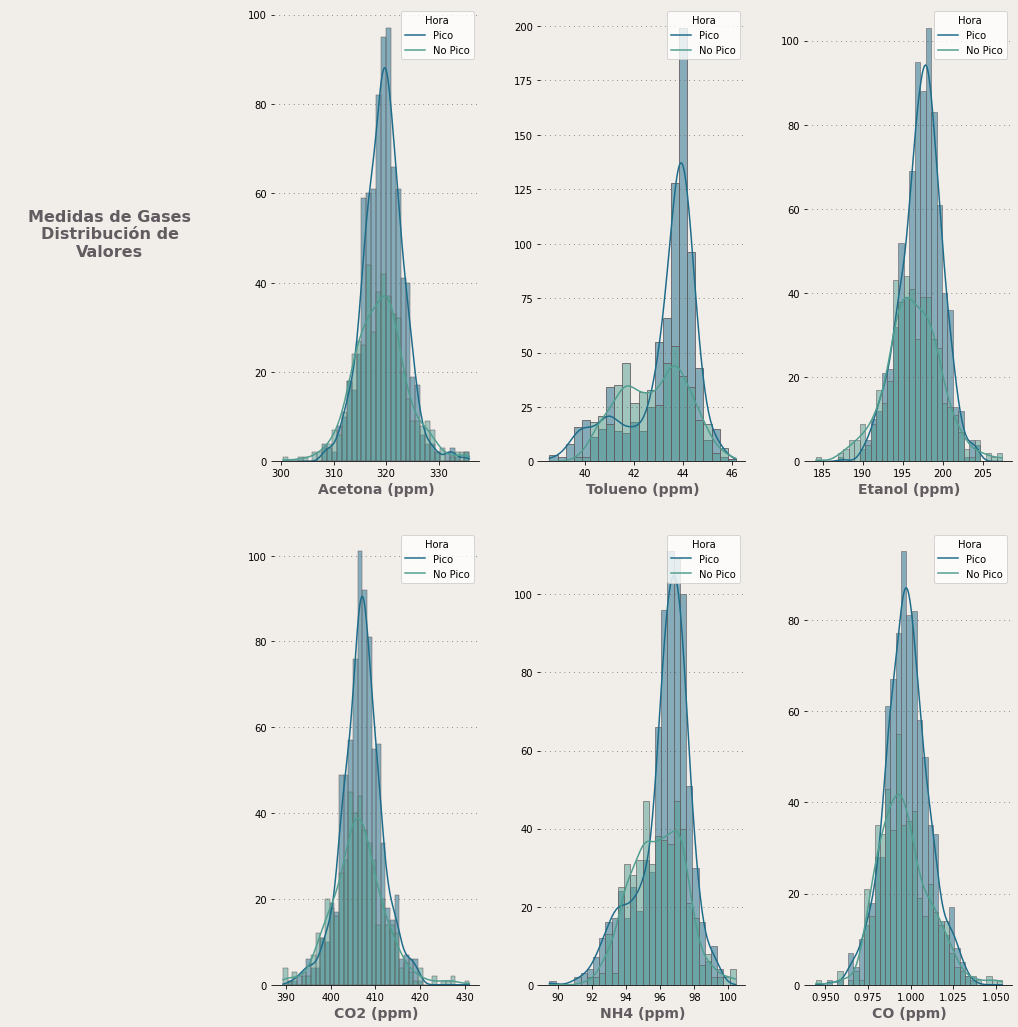

In [74]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(2, 4)
gs.update(wspace=0.3, hspace=0.15)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[0,3])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[1,3])

fig.patch.set_facecolor(BACKGROUND_COLOR)
ax0.set_facecolor(BACKGROUND_COLOR)
ax1.set_facecolor(BACKGROUND_COLOR)
ax2.set_facecolor(BACKGROUND_COLOR)
ax3.set_facecolor(BACKGROUND_COLOR)
ax4.set_facecolor(BACKGROUND_COLOR)
ax5.set_facecolor(BACKGROUND_COLOR)
ax6.set_facecolor(BACKGROUND_COLOR)

ax0.text(0.5, 0.5, "Medidas de Gases\nDistribución de\nValores",
         horizontalalignment = 'center',
         verticalalignment ='center',
         fontsize = 16,
         fontweight = 'bold',
         fontfamily = 'Sans',
         color= DARK_COLOR)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.grid(color=DARK_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.histplot(ax=ax1, data=whole_day_df, x='ACETONA', hue='is_peak_time', edgecolor=DARK_COLOR, palette="crest", kde=True)
ax1.set_xlabel("Acetona (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax1.set_ylabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax1.legend(title='Hora', loc='upper right', labels=['Pico', 'No Pico'])

ax2.grid(color=DARK_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.histplot(ax=ax2, data=whole_day_df, x='TOLUENO', hue='is_peak_time', edgecolor=DARK_COLOR, palette="crest", kde=True)
ax2.set_xlabel("Tolueno (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax2.set_ylabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax2.legend(title='Hora', loc='upper right', labels=['Pico', 'No Pico'])

ax3.grid(color=DARK_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.histplot(ax=ax3, data=whole_day_df, x='ETANOL', hue='is_peak_time', edgecolor=DARK_COLOR, palette="crest", kde=True)
ax3.set_xlabel("Etanol (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax3.set_ylabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax3.legend(title='Hora', loc='upper right', labels=['Pico', 'No Pico'])

ax4.grid(color=DARK_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.histplot(ax=ax4, data=whole_day_df, x='CO2', hue='is_peak_time', edgecolor=DARK_COLOR, palette="crest", kde=True)
ax4.set_xlabel("CO2 (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax4.set_ylabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax4.legend(title='Hora', loc='upper right', labels=['Pico', 'No Pico'])

ax5.grid(color=DARK_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.histplot(ax=ax5, data=whole_day_df, x='NH4', hue='is_peak_time', edgecolor=DARK_COLOR, palette="crest", kde=True)
ax5.set_xlabel("NH4 (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax5.set_ylabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax5.legend(title='Hora', loc='upper right', labels=['Pico', 'No Pico'])

ax6.grid(color=DARK_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.histplot(ax=ax6, data=whole_day_df, x='CO', hue='is_peak_time', edgecolor=DARK_COLOR, palette="crest", kde=True)
ax6.set_xlabel("CO (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax6.set_ylabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK_COLOR)
ax6.legend(title='Hora', loc='upper right', labels=['Pico', 'No Pico'])



ax0_hide_spines = ["top", "left", "bottom", "right"]
for spine in ax0_hide_spines:
  ax0.spines[spine].set_visible(False)

axg_hide_spines = ["top", "left", "right"]
axg = [ax1, ax2, ax3, ax4, ax5, ax6]
for ax in axg:
  for spine in axg_hide_spines:
    ax.spines[spine].set_visible(False)

In [75]:
MAIN1_COLOR = "#6868ac"
DARK1_COLOR = "#625c60"
SECONDARY1_COLOR = "#8a5796"
THIRD1_COLOR = "#cfbe54"
BACKGROUND1_COLOR = "#f1ede9"

#### Mes Noviembre: 01/11/2022 - 11/11/2022

In [ ]:
two_weeks_df = two_weeks.copy(deep=True)
two_weeks_df

,Raw_value_MQ135,ACETONA,TOLUENO,ETANOL,CO2,NH4,CO,place,is_peak_time
Timestamp,,,,,,,,,
2022-11-01 05:57:59,11396.67,322.6066,45.49860,198.9592,409.2048,99.27898,1.023395,sotanos,0
2022-11-01 05:58:20,12151.67,329.7806,48.38720,201.5529,419.1891,98.52309,1.017045,sotanos,0
2022-11-01 05:58:40,12061.00,321.6122,44.73391,203.8036,411.1059,98.27495,0.975440,sotanos,0
2022-11-01 05:59:01,12009.00,323.9269,49.77067,198.3085,402.0006,97.53169,0.995882,sotanos,0
2022-11-01 05:59:22,12050.00,324.9276,47.05805,199.4448,408.8397,98.54244,0.997909,sotanos,0
...,...,...,...,...,...,...,...,...,...
2022-11-11 15:26:55,14440.33,319.7577,43.95366,198.0735,405.1731,96.54674,1.001915,cafeteria,1
2022-11-11 15:27:16,14507.00,319.7264,44.02377,197.8970,406.2138,97.23755,0.972603,cafeteria,1
2022-11-11 15:27:37,14405.67,322.8594,43.88305,197.8951,399.7797,97.40422,1.004054,cafeteria,1


In [84]:
two_weeks_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Raw_value_MQ135,10264.0,14145.833609,2352.610013,8434.67000,12314.330000,14296.330000,16034.415000,23843.000000
ACETONA,10264.0,321.937446,4.836059,300.40610,318.864750,321.838700,324.909700,343.075000
TOLUENO,10264.0,45.729597,2.640846,38.56417,43.883050,45.512260,47.529850,53.576060
ETANOL,10264.0,199.565978,3.688449,184.17970,197.129800,199.552900,202.009100,213.370800
CO2,10264.0,409.311474,5.504873,389.38190,405.934625,409.244050,412.607100,438.930800
NH4,10264.0,98.743198,2.720003,89.52150,96.832350,98.579760,100.594040,107.763380
CO,10264.0,1.013358,0.030106,0.94441,0.994235,1.004458,1.022588,1.144914
is_peak_time,10264.0,0.628995,0.483097,0.00000,0.000000,1.000000,1.000000,1.000000


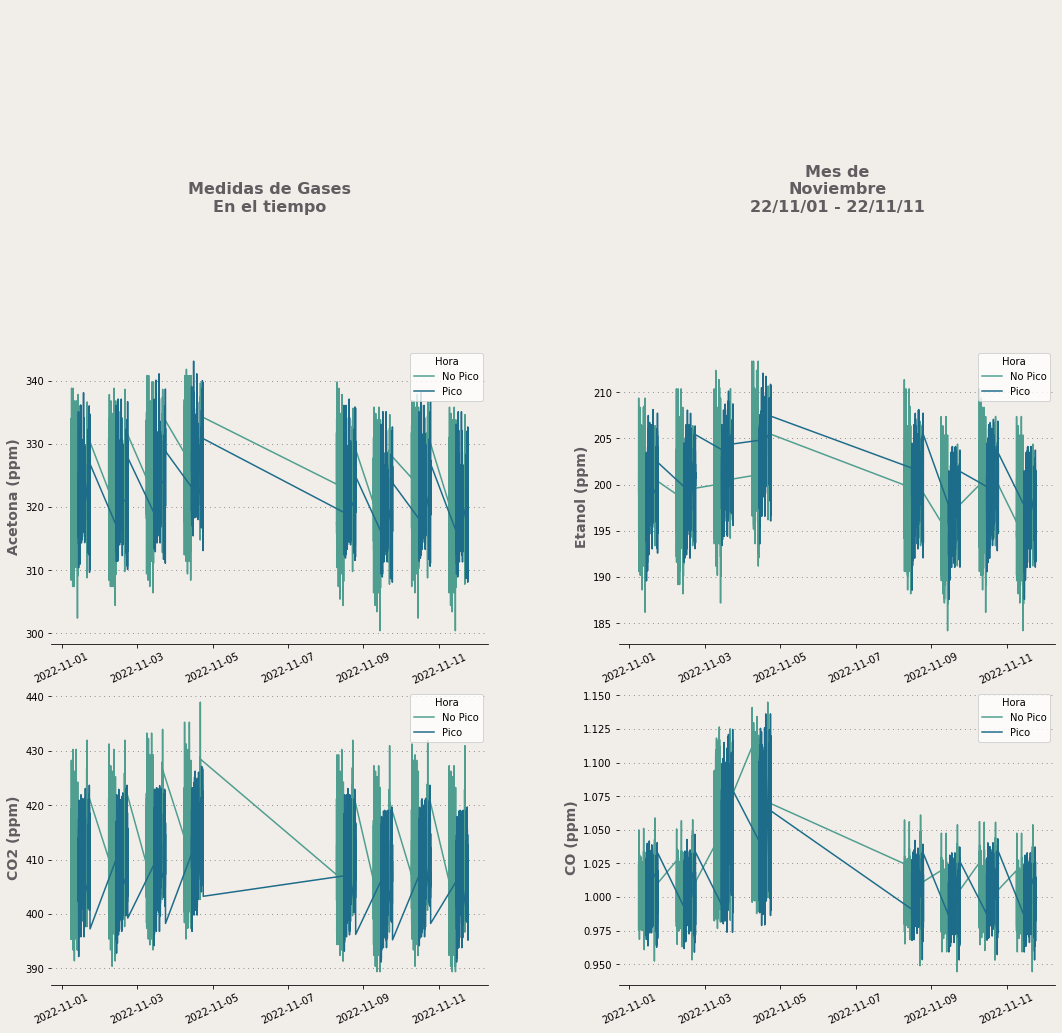

In [ ]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.3, hspace=0.15)

ax0 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[2,1])

fig.patch.set_facecolor(BACKGROUND1_COLOR)
ax0.set_facecolor(BACKGROUND1_COLOR)
ax01.set_facecolor(BACKGROUND1_COLOR)
ax1.set_facecolor(BACKGROUND1_COLOR)
ax2.set_facecolor(BACKGROUND1_COLOR)
ax3.set_facecolor(BACKGROUND1_COLOR)
ax4.set_facecolor(BACKGROUND1_COLOR)

ax0.text(0.5, 0.3, "Medidas de Gases\nEn el tiempo",
         horizontalalignment = 'center',
         verticalalignment ='bottom',
         fontsize = 16,
         fontweight = 'bold',
         fontfamily = 'Sans',
         color= DARK1_COLOR)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax01.text(0.5, 0.3, "Mes de\nNoviembre\n22/11/01 - 22/11/11",
         horizontalalignment = 'center',
         verticalalignment ='bottom',
         fontsize = 16,
         fontweight = 'bold',
         fontfamily = 'Sans',
         color= DARK1_COLOR)
ax01.set_xticklabels([])
ax01.set_yticklabels([])
ax01.tick_params(left=False, bottom=False)

ax1.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax1, data=two_weeks_df, x=two_weeks_df.index, y='ACETONA', palette="crest", hue="is_peak_time")
ax1.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax1.set_ylabel("Acetona (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax1.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax2.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax2, data=two_weeks_df, x=two_weeks_df.index, y='ETANOL', palette="crest", hue="is_peak_time")
ax2.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax2.set_ylabel("Etanol (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax2.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax3.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax3, data=two_weeks_df, x=two_weeks_df.index, y='CO2', palette="crest", hue="is_peak_time")
ax3.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax3.set_ylabel("CO2 (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax3.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax4.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax4, data=two_weeks_df, x=two_weeks_df.index, y='CO', palette="crest", hue="is_peak_time")
ax4.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax4.set_ylabel("CO (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax4.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])



ax0_hide_spines = ["top", "left", "bottom", "right"]
for spine in ax0_hide_spines:
  ax0.spines[spine].set_visible(False)
  ax01.spines[spine].set_visible(False)

axg_hide_spines = ["top", "left", "right"]
axg = [ax1, ax2, ax3, ax4]
for ax in axg:
  for spine in axg_hide_spines:
    ax.spines[spine].set_visible(False)

for ax in [ax0, ax01, ax1, ax2, ax3, ax4]:
  ax.tick_params(axis='x', rotation=25)

#### Día con mayor presencia de gases - 04/11/2022

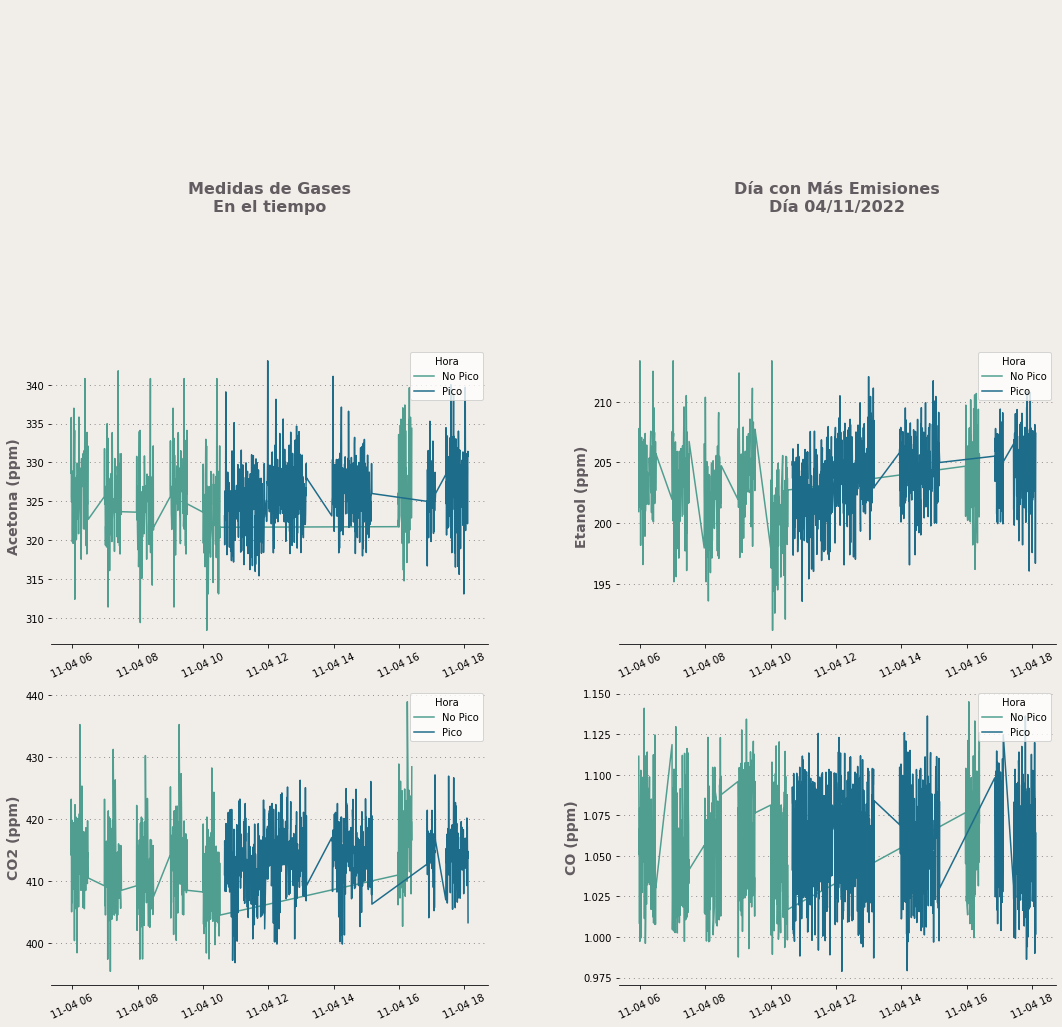

In [83]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.3, hspace=0.15)

ax0 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[2,1])

fig.patch.set_facecolor(BACKGROUND1_COLOR)
ax0.set_facecolor(BACKGROUND1_COLOR)
ax01.set_facecolor(BACKGROUND1_COLOR)
ax1.set_facecolor(BACKGROUND1_COLOR)
ax2.set_facecolor(BACKGROUND1_COLOR)
ax3.set_facecolor(BACKGROUND1_COLOR)
ax4.set_facecolor(BACKGROUND1_COLOR)

ax0.text(0.5, 0.3, "Medidas de Gases\nEn el tiempo",
         horizontalalignment = 'center',
         verticalalignment ='bottom',
         fontsize = 16,
         fontweight = 'bold',
         fontfamily = 'Sans',
         color= DARK1_COLOR)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax01.text(0.5, 0.3, "Día con Más Emisiones\nDía 04/11/2022",
         horizontalalignment = 'center',
         verticalalignment ='bottom',
         fontsize = 16,
         fontweight = 'bold',
         fontfamily = 'Sans',
         color= DARK1_COLOR)
ax01.set_xticklabels([])
ax01.set_yticklabels([])
ax01.tick_params(left=False, bottom=False)

ax1.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax1, data=date1104_df, x=date1104_df.index, y='ACETONA', palette="crest", hue="is_peak_time")
ax1.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax1.set_ylabel("Acetona (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax1.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax2.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax2, data=date1104_df, x=date1104_df.index, y='ETANOL', palette="crest", hue="is_peak_time")
ax2.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax2.set_ylabel("Etanol (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax2.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax3.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax3, data=date1104_df, x=date1104_df.index, y='CO2', palette="crest", hue="is_peak_time")
ax3.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax3.set_ylabel("CO2 (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax3.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax4.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax4, data=date1104_df, x=date1104_df.index, y='CO', palette="crest", hue="is_peak_time")
ax4.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax4.set_ylabel("CO (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax4.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])



ax0_hide_spines = ["top", "left", "bottom", "right"]
for spine in ax0_hide_spines:
  ax0.spines[spine].set_visible(False)
  ax01.spines[spine].set_visible(False)

axg_hide_spines = ["top", "left", "right"]
axg = [ax1, ax2, ax3, ax4]
for ax in axg:
  for spine in axg_hide_spines:
    ax.spines[spine].set_visible(False)

for ax in [ax0, ax01, ax1, ax2, ax3, ax4]:
  ax.tick_params(axis='x', rotation=25)

#### Día con menor presencia de gases - 09/11/2022

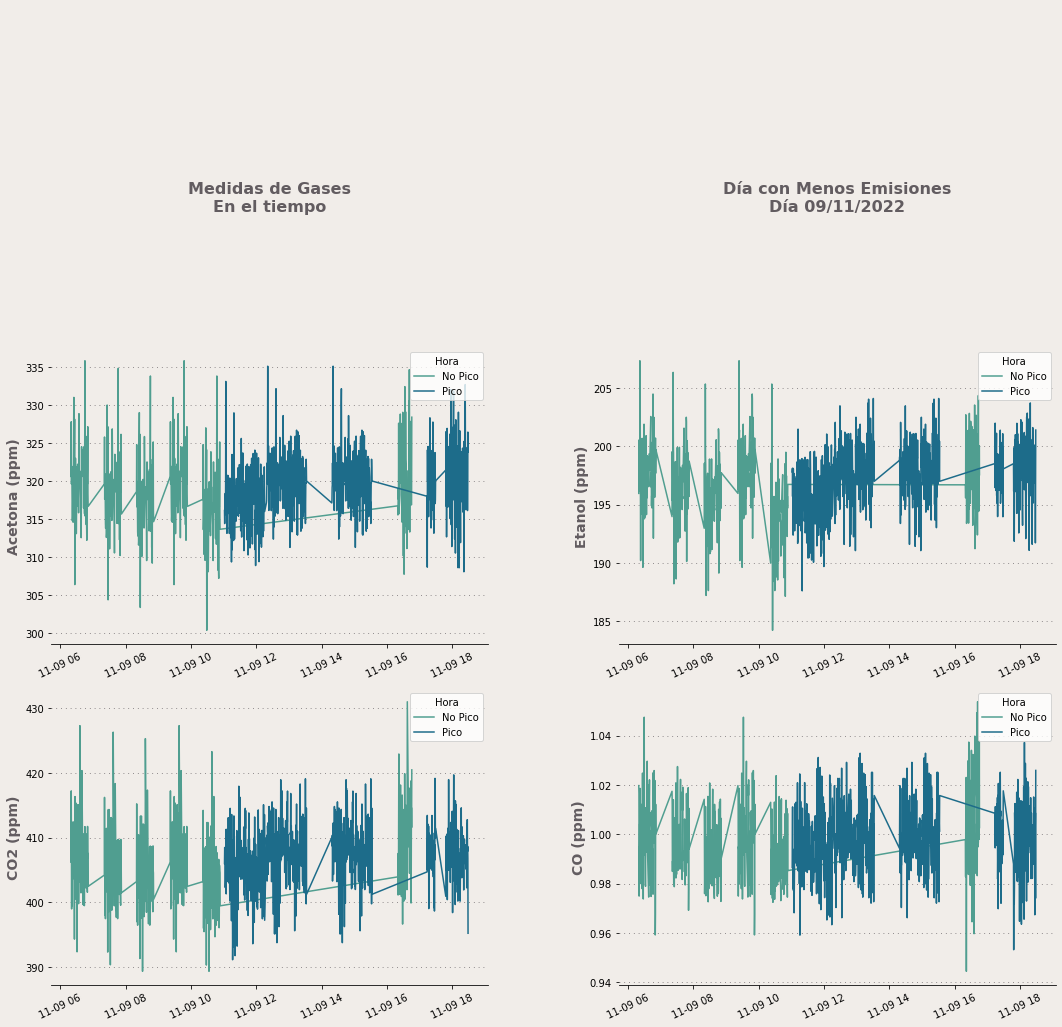

In [81]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.3, hspace=0.15)

ax0 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[2,1])

fig.patch.set_facecolor(BACKGROUND1_COLOR)
ax0.set_facecolor(BACKGROUND1_COLOR)
ax01.set_facecolor(BACKGROUND1_COLOR)
ax1.set_facecolor(BACKGROUND1_COLOR)
ax2.set_facecolor(BACKGROUND1_COLOR)
ax3.set_facecolor(BACKGROUND1_COLOR)
ax4.set_facecolor(BACKGROUND1_COLOR)

ax0.text(0.5, 0.3, "Medidas de Gases\nEn el tiempo",
         horizontalalignment = 'center',
         verticalalignment ='bottom',
         fontsize = 16,
         fontweight = 'bold',
         fontfamily = 'Sans',
         color= DARK1_COLOR)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax01.text(0.5, 0.3, "Día con Menos Emisiones\nDía 09/11/2022",
         horizontalalignment = 'center',
         verticalalignment ='bottom',
         fontsize = 16,
         fontweight = 'bold',
         fontfamily = 'Sans',
         color= DARK1_COLOR)
ax01.set_xticklabels([])
ax01.set_yticklabels([])
ax01.tick_params(left=False, bottom=False)

ax1.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax1, data=whole_day_df, x=whole_day_df.index, y='ACETONA', palette="crest", hue="is_peak_time")
ax1.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax1.set_ylabel("Acetona (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax1.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax2.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax2, data=whole_day_df, x=whole_day_df.index, y='ETANOL', palette="crest", hue="is_peak_time")
ax2.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax2.set_ylabel("Etanol (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax2.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax3.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax3, data=whole_day_df, x=whole_day_df.index, y='CO2', palette="crest", hue="is_peak_time")
ax3.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax3.set_ylabel("CO2 (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax3.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax4.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax4, data=whole_day_df, x=whole_day_df.index, y='CO', palette="crest", hue="is_peak_time")
ax4.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax4.set_ylabel("CO (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax4.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])



ax0_hide_spines = ["top", "left", "bottom", "right"]
for spine in ax0_hide_spines:
  ax0.spines[spine].set_visible(False)
  ax01.spines[spine].set_visible(False)

axg_hide_spines = ["top", "left", "right"]
axg = [ax1, ax2, ax3, ax4]
for ax in axg:
  for spine in axg_hide_spines:
    ax.spines[spine].set_visible(False)

for ax in [ax0, ax01, ax1, ax2, ax3, ax4]:
  ax.tick_params(axis='x', rotation=25)

In [ ]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.3, hspace=0.15)

ax0 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[2,1])

fig.patch.set_facecolor(BACKGROUND1_COLOR)
ax0.set_facecolor(BACKGROUND1_COLOR)
ax01.set_facecolor(BACKGROUND1_COLOR)
ax1.set_facecolor(BACKGROUND1_COLOR)
ax2.set_facecolor(BACKGROUND1_COLOR)
ax3.set_facecolor(BACKGROUND1_COLOR)
ax4.set_facecolor(BACKGROUND1_COLOR)

ax0.text(0.5, 0.3, "Medidas de Gases\nEn el tiempo",
         horizontalalignment = 'center',
         verticalalignment ='bottom',
         fontsize = 16,
         fontweight = 'bold',
         fontfamily = 'Sans',
         color= DARK1_COLOR)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax01.text(0.5, 0.3, "Día con Menos Emisiones\nDía 09/11/2022",
         horizontalalignment = 'center',
         verticalalignment ='bottom',
         fontsize = 16,
         fontweight = 'bold',
         fontfamily = 'Sans',
         color= DARK1_COLOR)
ax01.set_xticklabels([])
ax01.set_yticklabels([])
ax01.tick_params(left=False, bottom=False)

ax1.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax1, data=whole_day_df, x=whole_day_df.index, y='ACETONA', palette="crest", hue="is_peak_time")
ax1.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax1.set_ylabel("Acetona (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax1.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax2.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax2, data=whole_day_df, x=whole_day_df.index, y='ETANOL', palette="crest", hue="is_peak_time")
ax2.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax2.set_ylabel("Etanol (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax2.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax3.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax3, data=whole_day_df, x=whole_day_df.index, y='CO2', palette="crest", hue="is_peak_time")
ax3.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax3.set_ylabel("CO2 (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax3.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])

ax4.grid(color=DARK1_COLOR, linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.lineplot(ax=ax4, data=whole_day_df, x=whole_day_df.index, y='CO', palette="crest", hue="is_peak_time")
ax4.set_xlabel("", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax4.set_ylabel("CO (ppm)", fontsize=14, fontweight='bold', fontfamily='Sans', color=DARK1_COLOR)
ax4.legend(title='Hora', loc='upper right', labels=['No Pico', 'Pico'])



ax0_hide_spines = ["top", "left", "bottom", "right"]
for spine in ax0_hide_spines:
  ax0.spines[spine].set_visible(False)
  ax01.spines[spine].set_visible(False)

axg_hide_spines = ["top", "left", "right"]
axg = [ax1, ax2, ax3, ax4]
for ax in axg:
  for spine in axg_hide_spines:
    ax.spines[spine].set_visible(False)

for ax in [ax0, ax01, ax1, ax2, ax3, ax4]:
  ax.tick_params(axis='x', rotation=25)

### 4. Conclusiones